##  Esercizio 10.1

In questa simulazione l'obbiettivo è quello di risolvere il problema del TSP con l' algoritmo di ottimizzazione Simulated Annealing.

L'idea che sta alla base del SA nel TSP è effettuare una ricerca intelligente tra i vari percorsi possibili. Si parte da un individuo casuale $x$ con una certa lunghezza $L(x)$, si propone un altro individuo $y$ con lunghezza $L(y)$, se $L(y)<L(x)$ allora $y$ viene accettato, se invece $L(y)>L(x)$ $y$ viene accettato con una certa probabilità, tale probabilita diminuisce mano a mano che il sistema viene raffreddato. In questo modo a basse temperature, il sistema evolve sempre di più verso la direzione giusta ovvero quella per cui L diminuisce.

### Procedimento 

1. Ho selezionato un individuo $x$ casuale con lunghezza $L(x)$.
2. Ho proposto un nuovo individuo $y$ con lunghezza $L(y)$ mutando il precedente percorso $x$.  La mutazione viene fatta scegliendo casualmente una permutazione tra quelle utilizzate nel GA dell' esercitazione 9.
3. Ora all'individuo $y$ si associa una probabilità $p(y)$ definita nel seguente modo:

$$
P(y)=
\begin{cases}
 1 \hspace{1cm}  L(y) \leq L(x)\\
 e^{-\frac{1}{T}( L(y)-L(x) )} \hspace{1cm}  L(y)>L(x) \\
\end{cases}
$$

4. Trovata la probabilità $p(y)$ ho generato un numero casuale $r \in [0,1)$ se $r<p(y)$ il percorso y viene accettato altrimenti si propone un altro percorso.

5. Questo procedimento si effettua $n$ volte a temperatura $T$ fissata. Finiti gli n passi a temperatura costante si ricomincia abbassando un po' la $T$, così facendo mano a mano che il sistema viene raffreddato la probabilità di accettazione del metropolis diminuisce e vengono accettate in modo sempre maggiore mosse con lunghezza minore di quella corrente.

Accettare mosse in salita, ovvero con lunghezza maggiore di quella corrente, con il metropolis è fondamentale per evitare di cadere in un minimo locale. Per questo motivo è cruciale raffreddare lentamente il sistema e non troppo velocemnte in modo che l'algoritmo non cerchi solo tra percorsi vicini a quello iniziale, ma si allontani e faccia una ricerca più ampia. Per questo motivo è molto importante la scelta delle coppie di temperatura e numero di passi per ciclo.

### Parametri

I parametri fondamentali da scegliere per il SA sono la temperatura iniziale e come questa diminuisce ad ogni ciclo e il numero di passi per ciclo.

#### Temperatura
Per scegliere la temperatura inziale ho fissato una soglia sotto alla quale la probabilità del metropolis (alla temperatura iniziale) non deve scendere. La soglia che ho fissato è del $90 \%$. Chiaramente la probabilità del metropolis oltre a dipendere dalla temperature dipende dalla differenza delle lunghezze tra l'individuo vecchio e nuovo, per questo parlo di soglia minima, più semplicemente ho fissato la T iniziale nel seguente modo:
$$
T_{iniz}=\frac{\Delta L_{max}}{\log(p)}
$$

Facendo $10^6$ proposte con $p=0.90$ ho trovato una $\Delta L_{max}=7.31$ che da una $T_{iniz}=70$.

Per scegliere la modalità di raffreddamento, ho pensato che essendo la $p \propto 1/T$, più si abbassano i valori di Temperatura più la probabilità del metropolis diventa sensibile ai cambiamenti di questa. Quindi ho scelto un legge del tipo 

$$ 
T_{i+1} = \alpha T_{i}\hspace{3mm} con \hspace{3mm} \alpha<1
$$

dove i indica l' i-esimo ciclo. In questo modo il sistema, mano a mano che la temperatura scende, si raffredda sempre più lentamente. Nel mio caso ho fissato un $\alpha=0.9$.

#### Passi
Ho deciso di tenere il numero di passi fisso per ogni ciclo, anche se non è la scelta più efficiente, ma ho comunque ritenuto fosse sufficiente per un buon risultato in un tempo discretamente breve. Il numero di passi che ho scelto è $n=10^6$.

### Risultati

Per entrambi i casi delle 32 città, riporto la lunghezza del miglior percorso in funzione dei cicli effettuati e un grafico del miglior percorso trovato dall'algoritmo.

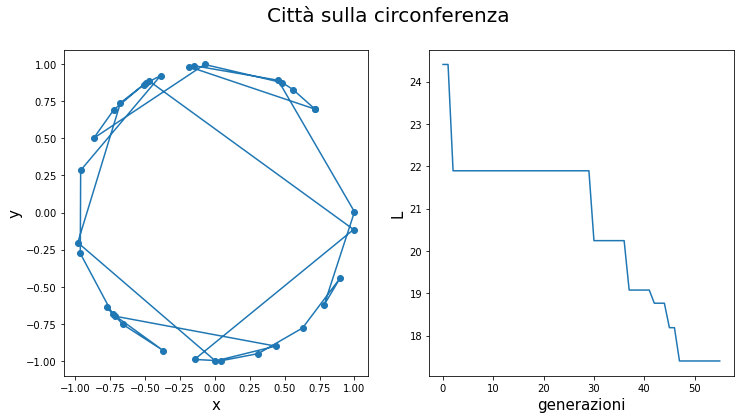

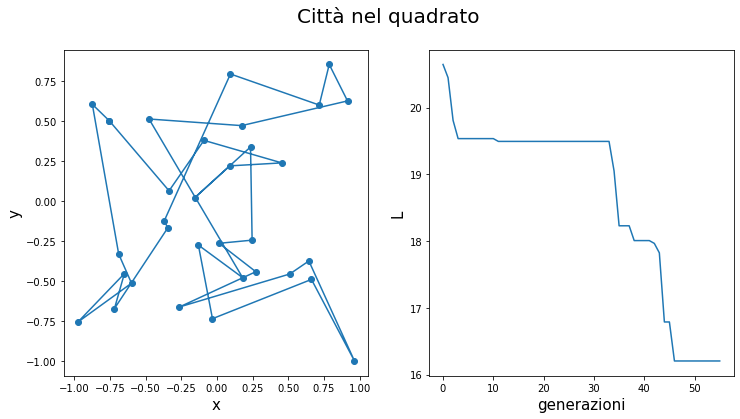

In [21]:
import numpy as np
import matplotlib.pyplot as plt

with open("MigliorPercorsoCirc.dat") as outBPC:
	BestPathCirc=np.loadtxt(outBPC,usecols=(0,1,2),dtype=float)

with open("MigliorIndividuoCirc.0") as outLC:
    LengthCirc=np.loadtxt(outLC,dtype=float)

    
with open("MigliorPercorsoSquare.dat") as outBPS:
	BestPathSquare=np.loadtxt(outBPS,usecols=(0,1,2),dtype=float)

with open("MigliorIndividuoSquare.0") as outLS:
    LengthSquare=np.loadtxt(outLS,dtype=float)

xC=np.arange(LengthCirc.size)
xS=np.arange(LengthSquare.size)

fig1=plt.figure(figsize=(12,6))
fig1.suptitle("Città sulla circonferenza",fontsize=20)
ax1=fig1.add_subplot(1,2,1)
ax2=fig1.add_subplot(1,2,2)
ax1.plot(BestPathCirc[:,0],BestPathCirc[:,1])
ax1.scatter(BestPathCirc[:,0],BestPathCirc[:,1])
ax2.plot(xC,LengthCirc)

ax1.set_ylabel("y",fontsize=15)
ax1.set_xlabel("x",fontsize=15)
ax2.set_ylabel("L",fontsize=15)
ax2.set_xlabel("generazioni",fontsize=15)
plt.show()

fig2=plt.figure(figsize=(12,6))
fig2.suptitle("Città nel quadrato",fontsize=20)
ax1=fig2.add_subplot(1,2,1)
ax2=fig2.add_subplot(1,2,2)

ax1.plot(BestPathSquare[:,0],BestPathSquare[:,1])
ax1.scatter(BestPathSquare[:,0],BestPathSquare[:,1])
ax2.plot(xS,LengthSquare)

ax1.set_ylabel("y",fontsize=15)
ax1.set_xlabel("x",fontsize=15)
ax2.set_ylabel("L",fontsize=15)
ax2.set_xlabel("generazioni",fontsize=15)

plt.show()

Non posso ritenermi soddisfatto del risultato, ma non sono riuscito a migliorarlo. A meno di errori logici nel codice che ho più volte ricontrollato le cause possono essere:
 1. Scelta sbagliata della temperatura iniziale, anche se le giustificazioni per quel valore mi sembrano giuste.
 2. Raffreddamento troppo veloce, ho provato a cambiare il valore di $\alpha$, ma non ho ottenuto risultati migliori.
 3. Un' altra ragione può essere la modalità di proposta di un nuovo individuo. Nel mio caso il vecchio viene permutato con una sola permutazione scelta casualemente tra quelle implementate nell' esercizio 9. Magari in questo modo l'algoritmo non riesce a fare una ricerca sufficientemente ampia e finisce subito in un minimo locale.